In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn import preprocessing, decomposition

X, y, X_test, X_valid = load_data("starting_kit/data") 

# Normalisation des données

In [58]:
from sklearn import preprocessing

#Normalizing data
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Réduction de dimension (PCA)
Pour commencer, gardons 100% des valeurs et observons la variance de chaque composante.

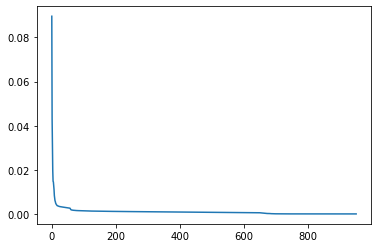

In [34]:
from sklearn import decomposition

#PCA analysis
pca_full = decomposition.PCA(n_components=952)
pca_full.fit(X_scaled)

#Pourcentage de variance entre les composantes
plt.plot(pca_full.explained_variance_ratio_)

Nous voyons que seulement les $n$ premières valeurs semblent contenir une information importante.
Nous considérerons donc toute les autre features comme du bruit qui risquerait de faire overfit notre modèle.

Nous décidons donc de réaliser une PCA en gardant ces $n$ composantes pour l'entraînement du modèle.

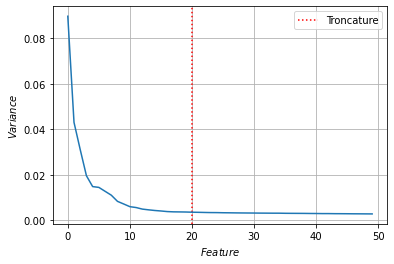

In [59]:
#PCA analysis
pca = decomposition.PCA(n_components=50)
pca.fit(X_scaled)

plt.axvline(x = 20, color = 'r', linestyle=':',label = 'Troncature') 

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("$Feature$")
plt.ylabel("$Variance$")
plt.legend()
plt.grid()

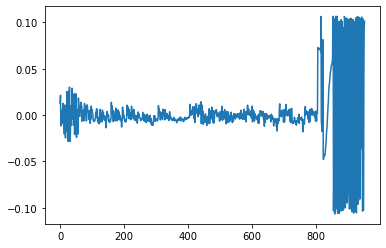

In [53]:
pcs = pca.components_
plt.plot(pcs[0])

# Splitting in training and testing set

In [56]:
X_tr = pca.transform(X_scaled)

from sklearn import model_selection
Xtr, Xte, ytr, yte = model_selection.train_test_split(X_tr, y, 
                                                      test_size=0.3, 
                                                      random_state=27)